In [2]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Recall, Precision

2023-06-07 14:03:52.768978: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-07 14:03:53.841034: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-07 14:03:57.451278: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
zip_path = 'ecg.zip'  # Provide the path to your zip file
extract_path = 'path/to/extract'  # Provide the path where you want to extract the contents

with zipfile.ZipFile('ecg.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [4]:
df_ptbd_normal = pd.read_csv('ptbdb_normal.csv')
df_ptbd_abnormal = pd.read_csv('ptbdb_abnormal.csv')

The shape of the normal dataframe is :  (4045, 188)
Class :  0.0
The shape of the abnormal dataframe is :  (10505, 188)
Class :  1.0
The last time value is :  1488.0


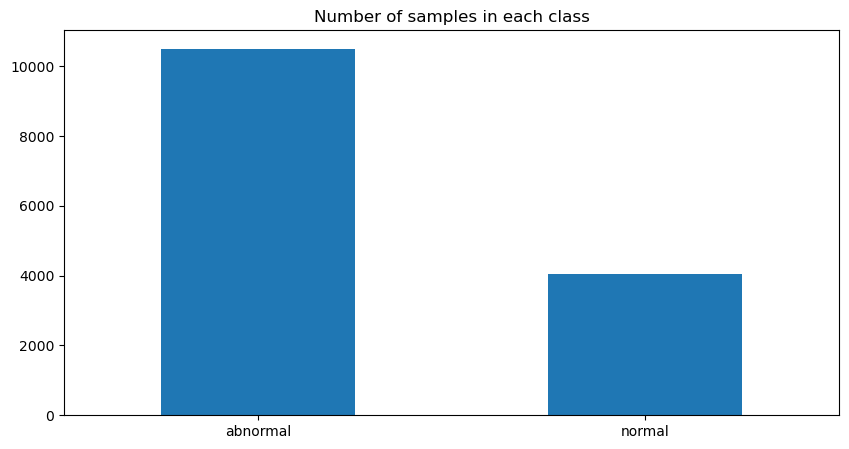

In [5]:
# print shapes of the dataframes
print("The shape of the normal dataframe is : ", df_ptbd_normal.shape)
# print one example of the last column
print("Class : ", df_ptbd_normal.iloc[:, -1][0])
print("The shape of the abnormal dataframe is : ", df_ptbd_abnormal.shape)
# print one example of the last column
print("Class : ", df_ptbd_abnormal.iloc[:, -1][0])

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal", 
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_ptbd_normal.shape[1] - 1 
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_ptbd_normal.columns = list(time) + ["label"]
df_ptbd_abnormal.columns = list(time) + ["label"]

# concatenate the two dataframes
df_ptbd = pd.concat([df_ptbd_normal, df_ptbd_abnormal], axis = 0)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure 
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()

In [6]:
df_ptbd.head(5)

,0.0,8.0,16.0,24.0,32.0,40.0,48.0,56.0,64.0,72.0,...,1424.0,1432.0,1440.0,1448.0,1456.0,1464.0,1472.0,1480.0,1488.0,label
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y = df_ptbd['label'].copy()
X = df_ptbd.drop('label', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [8]:
X_train

,0.0,8.0,16.0,24.0,32.0,40.0,48.0,56.0,64.0,72.0,...,1416.0,1424.0,1432.0,1440.0,1448.0,1456.0,1464.0,1472.0,1480.0,1488.0
4495,1.000000,0.552075,0.232576,0.023493,0.153485,0.221613,0.286609,0.319499,0.343774,0.328896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6689,1.000000,0.610129,0.110789,0.078080,0.110261,0.114482,0.123186,0.113954,0.124505,0.121868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9607,1.000000,0.753056,0.422983,0.012225,0.000000,0.144254,0.200489,0.229829,0.279951,0.243276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
969,1.000000,0.788889,0.413725,0.196732,0.075163,0.037255,0.096732,0.263399,0.355556,0.403268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7585,0.982280,0.892142,0.520031,0.181818,0.179507,0.218798,0.084746,0.016179,0.012327,0.020801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.000000,0.979786,0.621879,0.146849,0.000000,0.266944,0.356718,0.421522,0.450059,0.457788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1147,1.000000,0.648015,0.424677,0.315160,0.223816,0.156384,0.156863,0.122908,0.093735,0.122908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8127,0.931217,1.000000,0.465201,0.150183,0.035409,0.033374,0.049247,0.070818,0.078958,0.087505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,1.000000,0.588291,0.120570,0.056962,0.136076,0.181646,0.182595,0.185759,0.178481,0.186076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


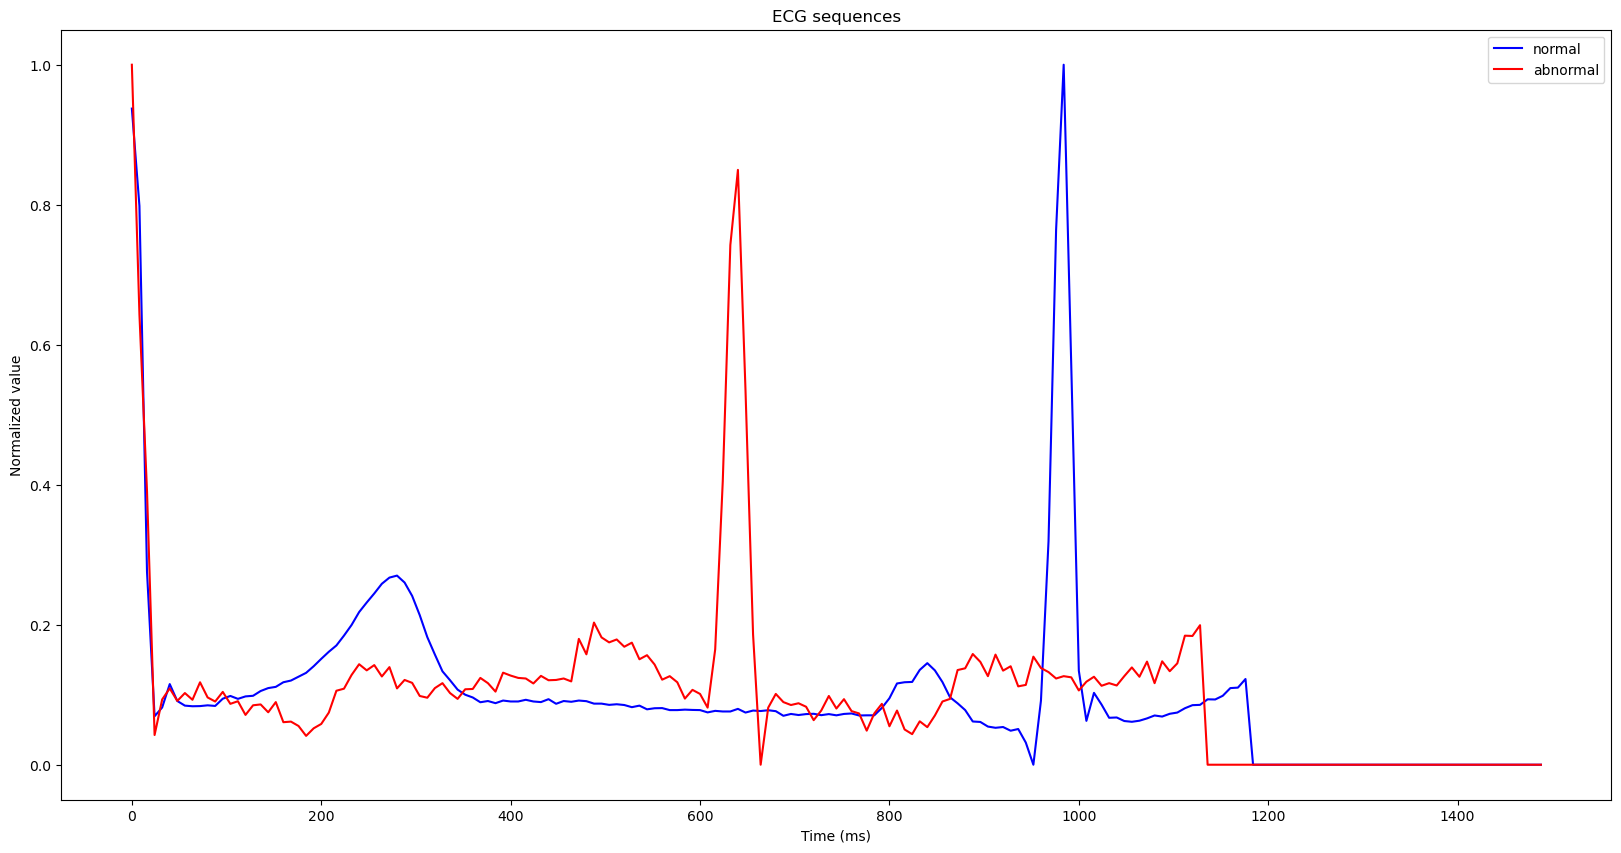

In [10]:
# plot a a row of the dataframe
# select 10 random sequences with class 0 (normal) and 10 with class 1 (abnormal)
df_ptbd_normal = df_ptbd[df_ptbd["label"] == 0].sample(1)
df_ptbd_abnormal = df_ptbd[df_ptbd["label"] == 1].sample(1)

# create a figure
plt.figure(figsize = (20, 10))
# plot againts the column names (time)
# plot the normal sequences
for i in range(df_ptbd_normal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1], color = "blue", label = "normal")
    else:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1],color = "blue")
# plot the abnormal sequences
for i in range(df_ptbd_abnormal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red", label = "abnormal")
    else:   
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red")
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
# set the title
plt.title("ECG sequences")
# y lable is "Normalized value"
plt.ylabel("Normalized value")
# x label is "Time (ms)"
plt.xlabel("Time (ms)")
# show the plot
plt.show()
# close
plt.close()

In [9]:
import catboost

In [10]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
#     loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    verbose=True
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

0:	learn: 0.6133996	total: 63.7ms	remaining: 255ms
1:	learn: 0.5564442	total: 74.1ms	remaining: 111ms
2:	learn: 0.5086403	total: 83.6ms	remaining: 55.7ms
3:	learn: 0.4714136	total: 93.2ms	remaining: 23.3ms
4:	learn: 0.4442926	total: 103ms	remaining: 0us
Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1}


In [11]:
preds = model.predict(X_test)

In [12]:
pred_results = pd.DataFrame({'actual_class': y_test, 
                             'pred_class': preds})

pred_results.head()

,actual_class,pred_class
1443,1.0,1.0
71,1.0,1.0
733,1.0,1.0
1353,1.0,1.0
6063,1.0,1.0


In [13]:
true_positive = ((pred_results['actual_class'] == 1) & (pred_results['pred_class'] == 1)).sum()

false_positive = ((pred_results['actual_class'] == 0) & (pred_results['pred_class'] == 1)).sum()

true_negative = ((pred_results['actual_class'] == 0) & (pred_results['pred_class'] == 0)).sum()

false_negative = ((pred_results['actual_class'] == 1) & (pred_results['pred_class'] == 0)).sum()

accuracy = (true_positive + true_negative) / len(pred_results)

recall = true_positive / (true_positive + false_negative)

precision = true_positive / (true_positive + false_positive)

# Display the results
print("True Positive:", true_positive)
print("False Positive:", false_positive)
print("True Negative:", true_negative)
print("False Negative:", false_negative)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

True Positive: 2877
False Positive: 443
True Negative: 765
False Negative: 280
Accuracy: 0.8343642611683849
Recall: 0.9113082039911308
Precision: 0.8665662650602409


In [14]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

2023-06-07 10:55:18.003068: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy', Recall(), Precision(),
        tf.keras.metrics.AUC(name='auc')
    ]
)

metrics=['accuracy', Recall(), Precision()]

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
255/255 [==============================] - 3s 5ms/step - loss: 0.4417 - accuracy: 0.7834 - recall: 0.9257 - precision: 0.8034 - auc: 0.8304 - val_loss: 0.3875 - val_accuracy: 0.8164 - val_recall: 0.9190 - val_precision: 0.8428 - val_auc: 0.8749
Epoch 2/100
255/255 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8297 - recall: 0.9042 - precision: 0.8653 - auc: 0.8953 - val_loss: 0.3458 - val_accuracy: 0.8444 - val_recall: 0.9379 - val_precision: 0.8607 - val_auc: 0.9061
Epoch 3/100
255/255 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.8472 - recall: 0.9131 - precision: 0.8793 - auc: 0.9146 - val_loss: 0.3219 - val_accuracy: 0.8616 - val_recall: 0.9265 - val_precision: 0.8881 - val_auc: 0.9202
Epoch 4/100
255/255 [==============================] - 1s 3ms/step - loss: 0.2997 - accuracy: 0.8659 - recall: 0.9245 - precision: 0.8930 - auc: 0.9312 - val_loss: 0.2895 - val_accuracy: 0.8763 - val_recall: 0.9312 - val_precisio

In [16]:
results = model.evaluate(X_test, y_test, verbose=0)

In [17]:
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("Test Recall: {:.2f}".format(results[2]))
print("Test Percision: {:.2f}".format(results[3]))
print("     Test AUC: {:.4f}".format(results[4]))

Test Accuracy: 95.49%
Test Recall: 0.98
Test Percision: 0.96
     Test AUC: 0.9852


# Recurrent Neural Network

In [18]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand)
flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)


model2 = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model2.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 187)]             0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 187, 1)           0         
                                                                 
 gru (GRU)                   (None, 187, 256)          198912    
                                                                 
 flatten (Flatten)           (None, 47872)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 47873     
                                                                 
Total params: 246,785
Trainable params: 246,785
Non-trainable params: 0
_________________________________________________________________
None


2023-06-07 10:56:08.260440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 10:56:08.262663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 10:56:08.264414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [20]:
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy', Recall(), Precision(),
        tf.keras.metrics.AUC(name='auc')
    ]
)

metrics=['accuracy', Recall(), Precision()]

history = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100


2023-06-07 10:56:27.570434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 10:56:27.572866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 10:56:27.574919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

255/255 [==============================] - ETA: 0s - loss: 0.4664 - accuracy: 0.7698 - recall_4: 0.9003 - precision_4: 0.8036 - auc: 0.8080

2023-06-07 10:57:22.265918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 10:57:22.268374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 10:57:22.270376: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

255/255 [==============================] - 60s 221ms/step - loss: 0.4664 - accuracy: 0.7698 - recall_4: 0.9003 - precision_4: 0.8036 - auc: 0.8080 - val_loss: 0.4639 - val_accuracy: 0.7644 - val_recall_4: 0.9534 - val_precision_4: 0.7747 - val_auc: 0.8283
Epoch 2/100
255/255 [==============================] - 55s 217ms/step - loss: 0.4171 - accuracy: 0.7966 - recall_4: 0.8907 - precision_4: 0.8372 - auc: 0.8558 - val_loss: 0.4035 - val_accuracy: 0.8081 - val_recall_4: 0.8502 - val_precision_4: 0.8817 - val_auc: 0.8705
Epoch 3/100
255/255 [==============================] - 55s 215ms/step - loss: 0.3786 - accuracy: 0.8225 - recall_4: 0.8946 - precision_4: 0.8637 - auc: 0.8840 - val_loss: 0.3629 - val_accuracy: 0.8321 - val_recall_4: 0.9561 - val_precision_4: 0.8365 - val_auc: 0.9046
Epoch 4/100
255/255 [==============================] - 55s 217ms/step - loss: 0.3485 - accuracy: 0.8465 - recall_4: 0.9090 - precision_4: 0.8815 - auc: 0.9039 - val_loss: 0.3627 - val_accuracy: 0.8213 - val_r

In [21]:
results2 = model2.evaluate(X_test, y_test, verbose=0)

In [22]:
print("Test Accuracy: {:.2f}%".format(results2[1] * 100))
print("Test Recall: {:.2f}".format(results2[2]))
print("Test Percision: {:.2f}".format(results2[3]))
print("     Test AUC: {:.4f}".format(results2[4]))

Test Accuracy: 95.99%
Test Recall: 0.98
Test Percision: 0.96
     Test AUC: 0.9916
